#Basketball-reference Data Graphically

In [2]:
# special IPython command to prepare the notebook for matplotlib
from collections import defaultdict
from pandas.stats.api import ols
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn import preprocessing

### Read Player Seaaon CSV

In [3]:
df_Season = pd.read_csv('e:\\nba\\Season_Quartile.csv', header=0)

df_Season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3439
Data columns (total 38 columns):
Season       3440 non-null object
Age          3440 non-null float64
Tm           3440 non-null object
Lg           3440 non-null object
Pos          3440 non-null object
G            3440 non-null float64
MP           3440 non-null float64
PER          3440 non-null float64
TS_Per       3440 non-null float64
Three_Per    3440 non-null float64
FT_Per       3440 non-null float64
ORB_Per      3440 non-null float64
DRB_Per      3440 non-null float64
TRB_Per      3440 non-null float64
AST_Per      3440 non-null float64
STL_Per      3440 non-null float64
BLK_Per      3440 non-null float64
TOV_Per      3440 non-null float64
USG_Per      3440 non-null float64
OWS          3440 non-null float64
DWS          3440 non-null float64
WS           3440 non-null float64
WS48         3440 non-null float64
OBPM         3440 non-null float64
DBPM         3440 non-null float64
BPM          3440 non-

###Read Player Playoffs CSV

In [4]:
df_Playoffs = pd.read_csv('e:\\nba\\Playoffs_Quartile.csv', header=0)

df_Playoffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595 entries, 0 to 1594
Data columns (total 38 columns):
Season       1595 non-null object
Age          1595 non-null float64
Tm           1595 non-null object
Lg           1595 non-null object
Pos          1595 non-null object
G            1595 non-null float64
MP           1595 non-null float64
PER          1595 non-null float64
TS_Per       1595 non-null float64
Three_Per    1595 non-null float64
FT_Per       1595 non-null float64
ORB_Per      1595 non-null float64
DRB_Per      1595 non-null float64
TRB_Per      1595 non-null float64
AST_Per      1595 non-null float64
STL_Per      1595 non-null float64
BLK_Per      1595 non-null float64
TOV_Per      1595 non-null float64
USG_Per      1595 non-null float64
OWS          1595 non-null float64
DWS          1595 non-null float64
WS           1595 non-null float64
WS48         1595 non-null float64
OBPM         1595 non-null float64
DBPM         1595 non-null float64
BPM          1595 non-

###Data Graphically

####Age & Quartile

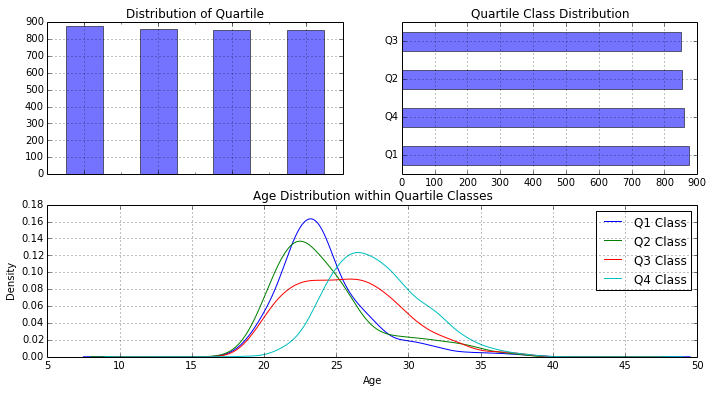

In [5]:
fig = plt.figure(figsize=(18,6), dpi=1600) # specifies the parameters of our graphs
a = 0.2                                    # sets the alpha level of the colors in the graph (for more attractive results)
a_bar = 0.55                               # another alpha setting

plt.subplot2grid((2,3),(0,0))              # lets us plot many diffrent shaped graphs together
df_Season.Quartile.value_counts().plot(kind='bar', alpha=a_bar) # plots a bar graph of Quartile Class
plt.title("Distribution of Quartile")      # puts a title on graph

plt.subplot2grid((2,3),(0,1))
df_Season.Quartile.value_counts().plot(kind="barh", alpha=a_bar)
plt.title("Quartile Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
df_Season.Age[df_Season.Quartile == "Q1"].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df_Season.Age[df_Season.Quartile == "Q2"].plot(kind='kde')
df_Season.Age[df_Season.Quartile == "Q3"].plot(kind='kde')
df_Season.Age[df_Season.Quartile == "Q4"].plot(kind='kde')
plt.xlabel("Age")                         # plots an axis lable
plt.title("Age Distribution within Quartile Classes");
plt.legend(('Q1 Class', 'Q2 Class','Q3 Class','Q4 Class'),loc='best') # sets our legend for our graph.


####PER & Quartile

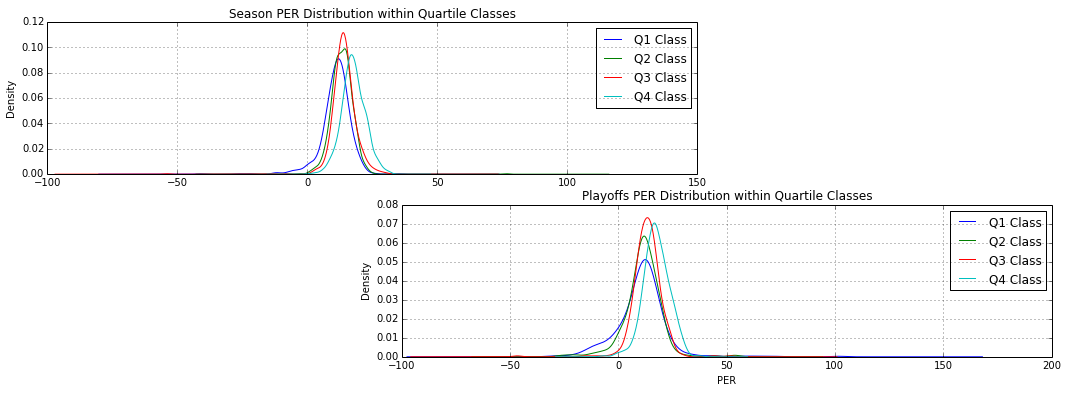

In [6]:
fig=plt.figure(figsize=(18,6), dpi=1600)
a=0.2

#Season PER & Quartile
plt.subplot2grid((2,3),(0,0), colspan=2)
df_Season.PER[df_Season.Quartile == "Q1"].plot(kind='kde')   
df_Season.PER[df_Season.Quartile == "Q2"].plot(kind='kde')
df_Season.PER[df_Season.Quartile == "Q3"].plot(kind='kde')
df_Season.PER[df_Season.Quartile == "Q4"].plot(kind='kde')
#plt.xlabel("PER")
plt.title("Season PER Distribution within Quartile Classes");
plt.legend(('Q1 Class', 'Q2 Class','Q3 Class','Q4 Class'),loc='best')

#Playoffs PER & Quartile
plt.subplot2grid((2,3),(1,1), colspan=2)
df_Playoffs.PER[df_Playoffs.Quartile == "Q1"].plot(kind='kde')   
df_Playoffs.PER[df_Playoffs.Quartile == "Q2"].plot(kind='kde')
df_Playoffs.PER[df_Playoffs.Quartile == "Q3"].plot(kind='kde')
df_Playoffs.PER[df_Playoffs.Quartile == "Q4"].plot(kind='kde')
plt.xlabel("PER")
plt.title("Playoffs PER Distribution within Quartile Classes");
plt.legend(('Q1 Class', 'Q2 Class','Q3 Class','Q4 Class'),loc='best') 

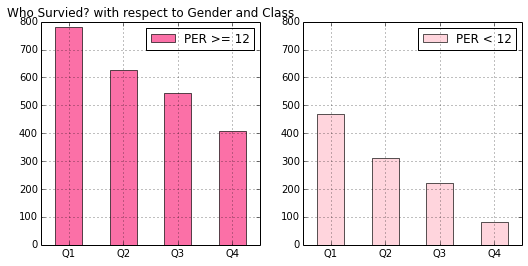

In [7]:
fig=plt.figure(figsize=(18,4), dpi=1600)
a=.65 # our alpha or opacity level.


# building on the previous code, here we create an additional subset with in the gender subset we created for the survived variable. 
# I know, thats a lot of subsets. After we do that we call value_counts() so it it can be easily plotted as a bar graph. 
# this is repeated for each gender class pair.

ax1=fig.add_subplot(141)
df_Season.Quartile[df_Season.PER >= 12].value_counts().plot(kind='bar', label='PER >= 12', color='#FA2479', alpha=a)
ax1.set_xticklabels(["Q1", "Q2", "Q3","Q4"], rotation=0)
plt.title("Who Survied? with respect to Gender and Class")
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
df_Season.Quartile[df_Season.PER < 12].value_counts().plot(kind='bar', label='PER < 12', color='pink', alpha=a)
ax2.set_xticklabels(["Q1", "Q2", "Q3","Q4"], rotation=0)
plt.legend(loc='best')

####Age & Quartile

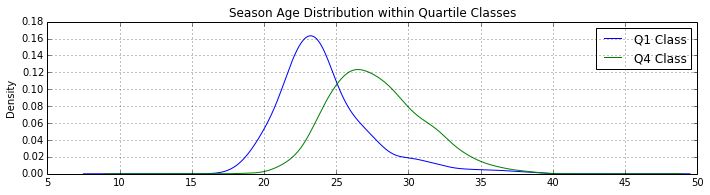

In [33]:
fig=plt.figure(figsize=(18,6), dpi=1600)
a=0.2

#Season PER & Quartile
plt.subplot2grid((2,3),(0,0), colspan=2)
df_Season.Age[df_Season.Quartile == "Q1"].plot(kind='kde')   
#df_Season.Age[df_Season.Quartile == "Q2"].plot(kind='kde')
#df_Season.Age[df_Season.Quartile == "Q3"].plot(kind='kde')
df_Season.Age[df_Season.Quartile == "Q4"].plot(kind='kde')
#plt.xlabel("PER")
plt.title("Season Age Distribution within Quartile Classes");
#plt.legend(('Q1 Class', 'Q2 Class','Q3 Class','Q4 Class'),loc='best')
plt.legend(('Q1 Class', 'Q4 Class'),loc='best')

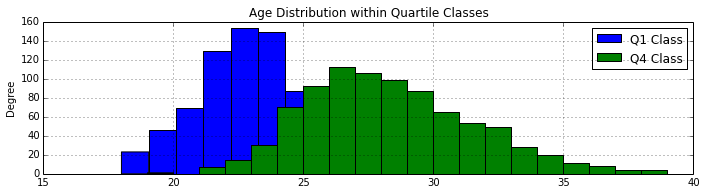

In [32]:
fig=plt.figure(figsize=(18,6), dpi=1600)
a=0.2

#Season PER & Quartile
plt.subplot2grid((2,3),(0,0), colspan=2)
df_Season.Age[df_Season.Quartile == "Q1"].plot(kind='hist',stacked=True, bins=20)   
#df_Season.Age[df_Season.Quartile == "Q2"].plot(kind='hist',stacked=True, bins=20)
#df_Season.Age[df_Season.Quartile == "Q3"].plot(kind='hist',stacked=True, bins=20)
df_Season.Age[df_Season.Quartile == "Q4"].plot(kind='hist',stacked=True, bins=20)
#plt.xlabel("PER")
plt.title("Age Distribution within Quartile Classes");
#plt.legend(('Q1 Class', 'Q2 Class','Q3 Class','Q4 Class'),loc='best')
plt.legend(('Q1 Class', 'Q4 Class'),loc='best')

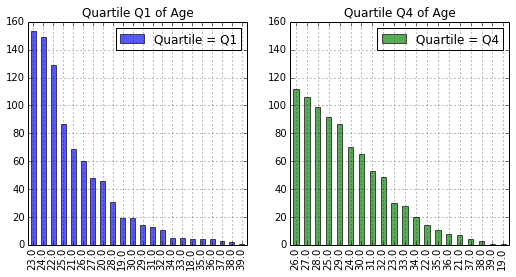

In [20]:
fig=plt.figure(figsize=(18,4), dpi=1600)
a=.65 # our alpha or opacity level.

ax1=fig.add_subplot(141)
df_Season.Age[df_Season.Quartile == "Q1"].value_counts().plot(kind='bar', label='Quartile = Q1', color='blue', alpha=a)
plt.title("Quartile Q1 of Age")
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
df_Season.Age[df_Season.Quartile == "Q4"].value_counts().plot(kind='bar', label='Quartile = Q4', color='green', alpha=a)
plt.title("Quartile Q4 of Age")
plt.legend(loc='best')
